In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

# 1. 데이터셋 로드 (pickle)

In [2]:
Youtube_shorts=pd.read_pickle(r"C:\Users\USER\Desktop\랩실 자료\[프로젝트] 킬링 타임 방지를 위한 유튜브 알고리즘 시각화 및 조정\코드 파일\찐막\[은호]찐막Youtube_shorts.pkl")
# Youtube_shorts=pd.read_pickle(r"C:\Users\USER\Desktop\랩실 자료\[프로젝트] 킬링 타임 방지를 위한 유튜브 알고리즘 시각화 및 조정\코드 파일\찐막\[정흠]찐막Youtube_shorts.pkl")
# Youtube_shorts=pd.read_pickle(r"C:\Users\USER\Desktop\랩실 자료\[프로젝트] 킬링 타임 방지를 위한 유튜브 알고리즘 시각화 및 조정\코드 파일\찐막\[지애]찐막Youtube_shorts.pkl")

# Youtube_shorts = pd.read_pickle(r"C:\Users\USER\Desktop\랩실 자료\[프로젝트] 킬링 타임 방지를 위한 유튜브 알고리즘 시각화 및 조정\코드 파일\찐막\모델링용 데이터\[은호]2초.pkl")
# Youtube_shorts = pd.read_pickle(r"C:\Users\USER\Desktop\랩실 자료\[프로젝트] 킬링 타임 방지를 위한 유튜브 알고리즘 시각화 및 조정\코드 파일\찐막\모델링용 데이터\[은호]5초.pkl")

# Youtube_shorts = pd.read_pickle(r"C:\Users\USER\Desktop\랩실 자료\[프로젝트] 킬링 타임 방지를 위한 유튜브 알고리즘 시각화 및 조정\코드 파일\찐막\모델링용 데이터\[정흠]2초.pkl")
# Youtube_shorts = pd.read_pickle(r"C:\Users\USER\Desktop\랩실 자료\[프로젝트] 킬링 타임 방지를 위한 유튜브 알고리즘 시각화 및 조정\코드 파일\찐막\모델링용 데이터\[정흠]5초.pkl")

# Youtube_shorts = pd.read_pickle(r"C:\Users\USER\Desktop\랩실 자료\[프로젝트] 킬링 타임 방지를 위한 유튜브 알고리즘 시각화 및 조정\코드 파일\찐막\모델링용 데이터\[지애]2초.pkl")
# Youtube_shorts = pd.read_pickle(r"C:\Users\USER\Desktop\랩실 자료\[프로젝트] 킬링 타임 방지를 위한 유튜브 알고리즘 시각화 및 조정\코드 파일\찐막\모델링용 데이터\[지애]5초.pkl")

In [6]:
print(len(Youtube_shorts[Youtube_shorts['video_pref']==0]))
print(len(Youtube_shorts[Youtube_shorts['video_pref']==1]))

14110
3601


# 2. feature extraction

#### 2.1 category_id를 카테고리별 시청 횟수로 mapping (이후 min_max_scaling)

In [9]:
category_counts=Youtube_shorts['category_id'].value_counts()
Youtube_shorts['category_id_counts'] = Youtube_shorts['category_id'].map(category_counts)

#### 2.2 watched_time 변환 (4시간 간격으로 변환함)

In [10]:
Youtube_shorts['time'] = pd.to_datetime(Youtube_shorts['watched_time'])
Youtube_shorts['watched_time_section'] = (Youtube_shorts['time'].dt.hour // 4)

In [11]:
Youtube_shorts[['time','watched_time_section']].head()

,time,watched_time_section
0,2023-09-25 13:48:09,3
3,2023-09-25 11:38:08,2
4,2023-09-25 11:38:06,2
6,2023-09-25 11:38:05,2
7,2023-09-25 11:37:59,2


# 3. 쓰지 않는 컬럼 제거

In [12]:
Youtube_shorts=Youtube_shorts.drop(columns=['title','id','date','hour','min', 'thumbnail','dimension','licensed_content','definition','watched_duration','tags','description'])

In [13]:
Youtube_shorts.head()

,category_id,view,like,comment,sec,watched_time,channel_title,caption,video_pref,already_watched,category_id_counts,time,watched_time_section
0,People & Blogs,2408465,27943,2044,54,2023-09-25 13:48:09,펀펀박스,True,1,0,4881.0,2023-09-25 13:48:09,3
3,Entertainment,7514827,115424,2376,8,2023-09-25 11:38:08,재밌는 거 올라온다,True,0,0,3601.0,2023-09-25 11:38:08,2
4,Gaming,180865,4959,19,45,2023-09-25 11:38:06,형독방송,True,1,0,2064.0,2023-09-25 11:38:06,2
6,Gaming,4293,20,6,19,2023-09-25 11:38:05,ORKA1,True,1,0,2064.0,2023-09-25 11:38:05,2
7,Entertainment,10488539,106704,399,15,2023-09-25 11:37:59,썰플리,True,0,0,3601.0,2023-09-25 11:37:59,2


In [14]:
print(list(Youtube_shorts.columns))

['category_id', 'view', 'like', 'comment', 'sec', 'watched_time', 'channel_title', 'caption', 'video_pref', 'already_watched', 'category_id_counts', 'time', 'watched_time_section']


In [15]:
Youtube_shorts=Youtube_shorts.dropna()

In [16]:
Youtube_shorts.isnull().sum()

category_id             0
view                    0
like                    0
comment                 0
sec                     0
watched_time            0
channel_title           0
caption                 0
video_pref              0
already_watched         0
category_id_counts      0
time                    0
watched_time_section    0
dtype: int64

In [17]:
Youtube_shorts.reset_index(drop=True, inplace=True)

# 4. 모델링 준비

원핫인코딩 : category_id, watched_time_section, channel_title, caption, already_watched

스케일링 : view, like,comment,sec, category_id_counts

target : video_pref

In [18]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
le = LabelEncoder()

# channel_title 열을 정수 인코딩
Youtube_shorts['channel_title'] = le.fit_transform(Youtube_shorts['channel_title'])

In [19]:
one_hot_list=['category_id', 'channel_title']
for i in one_hot_list:
    Youtube_shorts[i] = Youtube_shorts[i].astype(str)

In [20]:
# 원핫인코딩 적용한 데이터 프레임
encoded_data=pd.get_dummies(Youtube_shorts[one_hot_list])

In [21]:
encoded_data = encoded_data * 1

encoded_data

,category_id_Autos & Vehicles,category_id_Comedy,category_id_Education,category_id_Entertainment,category_id_Film & Animation,category_id_Gaming,category_id_Howto & Style,category_id_Music,category_id_News & Politics,category_id_People & Blogs,...,channel_title_990,channel_title_991,channel_title_992,channel_title_993,channel_title_994,channel_title_995,channel_title_996,channel_title_997,channel_title_998,channel_title_999
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17693,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17695,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
continuous_columns=['view', 'like','comment','sec']

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaler 객체 생성
scaler = MinMaxScaler()

# 선택한 컬럼들에 Min-Max Scaling 적용
scaled_data = scaler.fit_transform(Youtube_shorts[continuous_columns])
scaled_data = pd.DataFrame(scaled_data, columns=continuous_columns)

In [24]:
scaled_data.isnull().sum()

view       0
like       0
comment    0
sec        0
dtype: int64

In [25]:
# 원핫인코딩한 데이터프레임, 연속형특성 데이터프레임, 타겟변수 데이터프레임 병합
data=pd.concat((encoded_data, scaled_data, Youtube_shorts['video_pref']), axis=1)

In [26]:
data['video_pref'].value_counts()

video_pref
0    14097
1     3600
Name: count, dtype: int64

In [27]:
data.head()

,category_id_Autos & Vehicles,category_id_Comedy,category_id_Education,category_id_Entertainment,category_id_Film & Animation,category_id_Gaming,category_id_Howto & Style,category_id_Music,category_id_News & Politics,category_id_People & Blogs,...,channel_title_995,channel_title_996,channel_title_997,channel_title_998,channel_title_999,view,like,comment,sec,video_pref
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0.002524,7.974073e-04,0.010390,0.896552,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.007876,3.293935e-03,0.012078,0.103448,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.000190,1.414911e-04,0.000092,0.741379,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.000004,5.422210e-07,0.000025,0.293103,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.010993,3.045084e-03,0.002024,0.224138,0


### 최종 특성

['view', 'like','comment','sec']

['category_id', 'channel_title']

# 5. 모델링

In [29]:
y = data['video_pref']
X = data.drop(['video_pref'], axis=1)

random_state=2 일 때 가장 높은 것 같음

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=1)

In [31]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
import numpy as np

# 폴드 수
n_splits = 5

# KFOLD 객체
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 성능 지표 리스트
accuracies = []
f1_scores = []
reports = []

# 모델 파라미터
params = {
    'objective': 'binary',
    'metric': 'binary_logloss'
}

for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # lgb타입으로 변환
    d_train = lgb.Dataset(X_train_fold, label=y_train_fold)

    # 모델학습
    lgb_classifier = lgb.train(params, d_train)

    # 예측 확률 값
    y_pred_prob = lgb_classifier.predict(X_test_fold)

    # 확률 값을 이진 값으로 변환
    y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

    # 정확도
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracies.append(accuracy)

    # f1 score
    f1 = f1_score(y_test_fold, y_pred, average='weighted')
    f1_scores.append(f1)

    # classification report
    report = classification_report(y_test_fold, y_pred)
    reports.append(report)
    
print("평균 Accuracy:", np.mean(accuracies))
print("평균 F1 Score:", np.mean(f1_scores))
for i, report in enumerate(reports):
    print(f"fold {i+1}:\n", report)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2304, number of negative: 9021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in the train set: 11325, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203444 -> initscore=-1.364908
[LightGBM] [Info] Start training from score -1.364908
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2304, number of negative: 9021
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] 

In [32]:
# X_test에 대한 예측값
y_pred_prob_test = lgb_classifier.predict(X_test)

# 확률값 이진 값으로 변환
y_pred_test = [1 if prob > 0.5 else 0 for prob in y_pred_prob_test]

# 정확도
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test:.4f}")

# F1 score
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print(f"Test F1 Score: {f1_test:.4f}")

# classification report
report_test = classification_report(y_test, y_pred_test)
print("Classification Report for Test Data:\n", report_test)

Test Accuracy: 0.8203
Test F1 Score: 0.7807
Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      2820
           1       0.69      0.22      0.33       720

    accuracy                           0.82      3540
   macro avg       0.76      0.60      0.61      3540
weighted avg       0.80      0.82      0.78      3540



In [33]:
from sklearn.metrics import roc_auc_score

# X_test에 대한 예측값
y_pred_prob_test = lgb_classifier.predict(X_test)

# AUC 계산
auc_test = roc_auc_score(y_test, y_pred_prob_test)
print(f"Test AUC Score: {auc_test:.4f}")


Test AUC Score: 0.6504


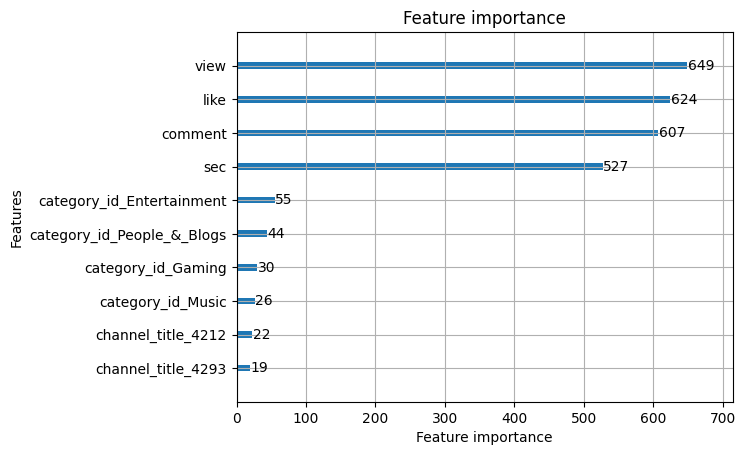

In [35]:
import matplotlib.pyplot as plt
lgb.plot_importance(lgb_classifier, max_num_features=10)  # 상위 10개 피처만 표시하도록 설정
plt.show()